<a href="https://colab.research.google.com/github/MN1973/DataScienceProject/blob/main/2a_Subjectlines_Logistic_Regression_UV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import bz2
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Mandar/Project/"
infile = open(DATA_PATH+'/9M.pkl','rb')
df = pickle.load(infile)

In [ ]:
df.shape

(9569374, 988)

In [ ]:
df.head(5)

,login_freq_in_OND21,age_breaks,account_agebreaks,subject,sub_length,sub_no_of_words,percentage_used,sender_name_brand,sender_name_rediff,sender_name_person,...,worth,would,write,x,yamuna,year,yeoor,yet,yr,zero
0,54,35to44yrs,acc11to15yrs,Trading A/c: Lowest Cost Great Offerings,41,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,84,45to54yrs,acc6to10yrs,Demat A/c In Just 5 mins,24,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,81,55+yrs,acc15+yrs,Complete family cover in a single plan,38,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,45to54yrs,acc11to15yrs,Limit risk of health complications,34,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,76,35to44yrs,acc11to15yrs,Stock market is calling Start investing,40,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['login_freq_in_OND21', 'age_breaks', 'account_agebreaks', 'subject',
       'sub_length', 'sub_no_of_words', 'percentage_used', 'sender_name_brand',
       'sender_name_rediff', 'sender_name_person',
       ...
       'worth', 'would', 'write', 'x', 'yamuna', 'year', 'yeoor', 'yet', 'yr',
       'zero'],
      dtype='object', length=988)

In [ ]:
valy=df['nl_open'].value_counts()
valy

0      9273287
1       247341
2        34251
3         8594
4         3040
5         1235
6          629
7          333
8          219
9          110
10          73
11          44
12          42
13          26
14          21
15          19
17          16
16          11
19          10
18           9
26           6
20           5
23           5
22           5
25           4
21           4
58           3
24           3
31           3
28           2
34           2
43           2
32           2
33           2
41           2
29           2
30           1
85           1
48           1
75           1
46           1
60           1
52           1
53           1
86           1
121          1
65           1
39           1
Name: nl_open, dtype: int64

In [ ]:
df.loc[df['nl_open'] < 0, 'nl_open'] = 0
df.loc[df['nl_open'] > 0, 'nl_open'] = 1

In [ ]:
uniqueValues = df['nl_open'].unique()
print(uniqueValues)

[1 0]


In [ ]:
Y = df['nl_open']

In [ ]:
Y.value_counts()

0    9273287
1     296087
Name: nl_open, dtype: int64

In [ ]:
colname = df.columns[48]
print(colname)

acc15+yrs


In [ ]:
df.columns.get_loc('login_freq_in_OND21')

0

# Without Tokens

In [ ]:
X = df.iloc[:, np.r_[6,7,10,16:30,38:49]]
#X1 = df.iloc[:, np.r_[6,7,10,16:30,38:988]]

In [ ]:
X.shape

(9569374, 28)

In [ ]:
X.columns

Index(['percentage_used', 'sender_name_brand', 'sender_name_others', 'is_male',
       'automobile', 'bfsi_business_loan', 'bfsi_credit_cards', 'bfsi_equity',
       'bfsi_fixed_deposit', 'bfsi_health_ins', 'bfsi_motor_ins',
       'bfsi_mutual_funds', 'bfsi_personal_loan', 'bfsi_term_ins', 'education',
       'health', 'real_estate', 'upto19yrs', '20to24yrs', '25to34yrs',
       '35to44yrs', '45to54yrs', '55+yrs', 'accupto2', 'acc3to5yrs',
       'acc6to10yrs', 'acc11to15yrs', 'acc15+yrs'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape

(6698561, 28)

In [ ]:
y_train.shape

(6698561,)

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

In [ ]:
from sklearn.utils.fixes import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 5)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=10, scoring='accuracy', n_jobs=-1, cv=cv, random_state=42)

In [ ]:
result = search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-pac

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9690288705291226
Best Hyperparameters: {'C': 0.0013629907319433752, 'penalty': 'none', 'solver': 'saga'}


In [ ]:
X, y = make_classification(random_state = 42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='saga',max_iter=500, class_weight='balanced',C= 0.0013629907319433752, penalty = 'none'))
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


0.6155712684873588

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
y_train.shape

(6698561,)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_t = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm_t)

Confusion Matrix : 
 [[1723221 1058967]
 [  44656   43969]]


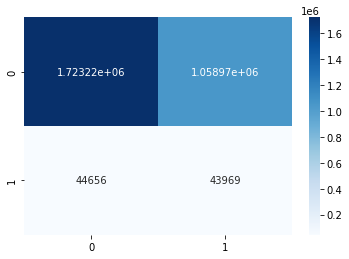

In [ ]:
import seaborn as sns
sns.heatmap(cm_t, annot=True, cmap='Blues',fmt='g')

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6155712684873588


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76   2782188
           1       0.04      0.50      0.07     88625

    accuracy                           0.62   2870813
   macro avg       0.51      0.56      0.42   2870813
weighted avg       0.95      0.62      0.74   2870813



In [ ]:
feature_names = ['percentage_used', 'sender_name_brand', 'sender_name_others', 'is_male',
       'automobile', 'bfsi_business_loan', 'bfsi_credit_cards', 'bfsi_equity',
       'bfsi_fixed_deposit', 'bfsi_health_ins', 'bfsi_motor_ins',
       'bfsi_mutual_funds', 'bfsi_personal_loan', 'bfsi_term_ins', 'education',
       'health', 'real_estate', 'upto19yrs', '20to24yrs', '25to34yrs',
       '35to44yrs', '45to54yrs', '55+yrs', 'accupto2', 'acc3to5yrs',
       'acc6to10yrs', 'acc11to15yrs', 'acc15+yrs']

In [ ]:
for i in feature_names:
  print(i)

percentage_used
sender_name_brand
sender_name_others
is_male
automobile
bfsi_business_loan
bfsi_credit_cards
bfsi_equity
bfsi_fixed_deposit
bfsi_health_ins
bfsi_motor_ins
bfsi_mutual_funds
bfsi_personal_loan
bfsi_term_ins
education
health
real_estate
upto19yrs
20to24yrs
25to34yrs
35to44yrs
45to54yrs
55+yrs
accupto2
acc3to5yrs
acc6to10yrs
acc11to15yrs
acc15+yrs


In [ ]:
w0 = pipe.steps[1][1].intercept_[0]
print(w0)

-0.06582339178496635


In [ ]:
pipe.named_steps['logisticregression'].coef_

array([[-0.02250831, -0.07342464, -0.05192643,  0.14738025, -0.03901437,
         0.00329565, -0.01707262, -0.0024033 ,  0.08887675, -0.00708696,
        -0.01636379,  0.04156128,  0.00442744,  0.00959813,  0.01752003,
        -0.03332575, -0.00833287, -0.64205539, -0.00584041, -0.16138314,
        -0.16084475, -0.03063006,  0.07840821, -0.04426637, -0.23796533,
        -0.39263493, -0.64733887, -0.70688884]])

In [ ]:
w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20, w21, w22, w23, w24, w25, w26, w27, w28 = pipe.steps[1][1].coef_[0]

In [ ]:
w = [w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20, w21, w22, w23, w24, w25, w26, w27, w28]

In [ ]:
feature_importance=pd.DataFrame(feature_names, columns = ['feature'])
feature_importance['importance'] = w
feature_importance.sort_values(by = ['importance'],ascending = False)


,feature,importance
3,is_male,0.147380
8,bfsi_fixed_deposit,0.088877
22,55+yrs,0.078408
11,bfsi_mutual_funds,0.041561
14,education,0.017520
13,bfsi_term_ins,0.009598
12,bfsi_personal_loan,0.004427
5,bfsi_business_loan,0.003296
7,bfsi_equity,-0.002403
18,20to24yrs,-0.005840


# With the tokens

Including all words.


In [ ]:
X1 = df.iloc[:, np.r_[6,7,10,16:30,38:988]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y, test_size = 0.3, random_state = 100)

In [ ]:
X_train.shape

(6698561, 967)

In [ ]:
y_train.shape

(6698561,)

In [ ]:
X, y = make_classification(random_state = 100)
pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='saga',max_iter=500))
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_wot = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm_wot)

In [ ]:
import seaborn as sns
sns.heatmap(cm_wot, annot=True, cmap='Blues',fmt='g')

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))